In [78]:
import numpy as np

# --- constants ---
G = 6.67430e-11
c = 299792458.0
M_sun = 1.98847e30

'''
Geometric unit of seconds chosen because that is the convention given by Barack & Cutler (2003)

In order to make 2*np.pi*Mtot*nu a unitless quantity, where nu: 1/s, then M = G*M/c**3
'''

# masses in SI
Mbh_SI = 1.0e6 * M_sun  #kg
m_SI   = 1.0   * M_sun  #kg

# convert to geometric seconds
Mbh = G*Mbh_SI/c**3   #seconds
m   = G*m_SI/c**3     #seconds
Mtot = Mbh + m        #seconds
mu  = m*Mbh / Mtot    #seconds
yr = 3600.0*24.0*365  #seconds
parsec_to_m = 3e16/c  #seconds



# Initial Conditions
X = 0.7               # Spin constant S**2/M
nu0 = 10**-3          # Initial orbital frequency, 1/s
e0 = 0.5              # Initial Eccentricity
cos_theta_s = 0.2
phi_s = 1             #radian
cos_theta_k = 0.3
phi_k = 2.0          #radians
lambda_var = 0.6     #radians
phi0 = 0
gamma0 = 0
alpha0 = 0
D = (10**9)*parsec_to_m  #meters



def de_dt_val(phi, nu, gamma, e):
    '''
    
    Equation 30 of Barack & Cutler (2003) 
    
    '''
    one_minus_e2 = max(1e-16, 1 - e**2)
    x = 2*np.pi*Mtot*nu
    x23, x83, x113 = x**(2/3), x**(8/3), x**(11/3)

    term1 = (304 + 121*e**2)*(1 - e**2)*(1 + 12*x23)
    term2 = (1/56)*x23*(8*16705 + 12*9082*e**2 - 25211*e**4)
    first_bracket = term1 - term2

    first_part = -(e/15.0)*(mu/Mtot**2)*one_minus_e2**(-3.5)*x83*first_bracket
    spin_part  =  e*(mu/Mtot**2)*X*np.cos(lambda_var)*x113*one_minus_e2**(-4)*(
                  (1364/5) + (5032/15)*e**2 + (263/10)*e**4)
    return first_part + spin_part


def dphi_dt(phi, nu, gamma, e):
    '''
    
    Equation 27 mean anomaly 

    '''
    return 2*np.pi*nu


def dgamma_dt(phi, nu, gamma, e):
    '''
    
    Equation 29 pericenter precession

    '''
    zero_term = max(1e-16, 1 - e**2)
    first_term = 6*np.pi*nu*(2*np.pi*nu*Mbh)**(2/3)*zero_term**(-1)
    second_term = 1 + 0.25*(2*np.pi*nu*Mbh)**(2/3)*zero_term**(-1)*(26 - 15*e**2)
    third_term = 12*np.pi*nu*X*np.cos(lambda_var)*(2*np.pi*Mbh*nu)*zero_term**(-1.5)
    return first_term*second_term - third_term


def dnu_dt(phi, nu, gamma, e):
    '''
    
    Equation 28 orbital frequency evolution 

    '''
    zero_term = max(1e-16, 1 - e**2)
    omM = 2*np.pi*Mbh*nu
    first_term = (96/(10*np.pi))*(m/(Mbh**3))*(omM**(11/3))*zero_term**(-4.5)
    a1 = 1 + (73/24)*e**2 + (37/96)*e**4
    b1 = (1273/336) - (2561/224)*e**2 - (3885/128)*e**4 - (13147/5376)*e**6
    c1 = (73/12) + (1211/24)*e**2 + (3143/96)*e**4 + (65/64)*e**6
    return first_term*(a1*(1 - e**2) + omM**(2/3)*b1 - omM*X*np.cos(lambda_var)*zero_term**(-0.5)*c1)


def dalpha_dt(phi, nu, gamma, e, alpha):
    '''
    
    Equation 31 nodal precession 
    '''
    
    zero_term = max(1e-16, 1 - e**2)
    return 4*np.pi*nu*X*(2*np.pi*Mbh*nu)*zero_term**(-1.5)


def pn_equations(t, y):

    phi, nu, gamma, e, alpha = y
    return [
        dphi_dt(phi, nu, gamma, e),
        dnu_dt(phi, nu, gamma, e),
        dgamma_dt(phi, nu, gamma, e),
        de_dt_val(phi, nu, gamma, e),
        dalpha_dt(phi, nu, gamma, e, alpha),
    ]


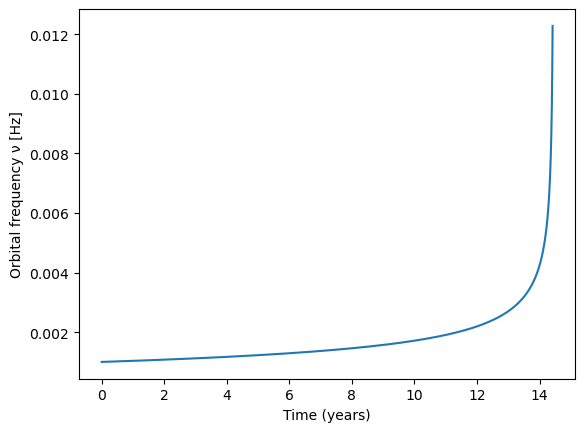

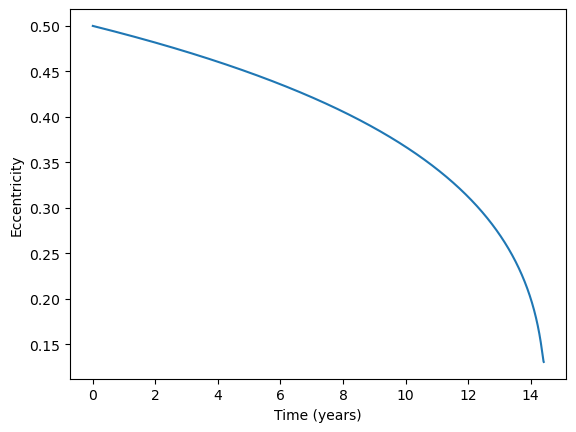

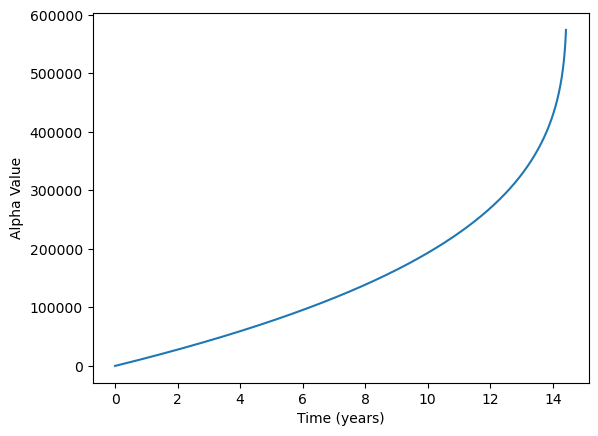

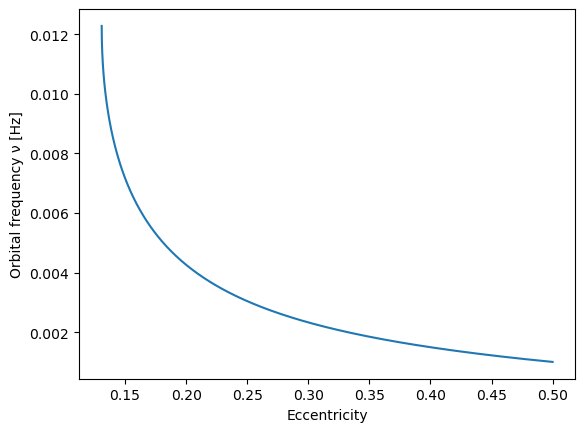

In [26]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def termination_event(t, y):
    phi, nu, gamma, e, alpha = y
    return -de_dt_val(phi, nu, gamma, e)
termination_event.terminal = True
termination_event.direction = -1

# initial conditions
y0 = [0, 1e-3, 0, 0.5, 0.0]
t_span = (0.0, 10**15)    
sol = solve_ivp(pn_equations, t_span, y0,
                rtol=1e-9, atol=1e-12, max_step=5e4, events=termination_event)
t = sol.t
phi_arr, nu_arr, gamma_arr, e_arr, alpha_arr = sol.y

plt.figure()
plt.plot(t/yr, nu_arr)
plt.xlabel("Time (years)")
plt.ylabel("Orbital frequency ν [Hz]")
plt.show()

plt.figure()
plt.plot(t/yr, e_arr)
plt.xlabel("Time (years)")
plt.ylabel("Eccentricity")
plt.show()


plt.figure()
plt.plot(t/yr, alpha_arr)
plt.xlabel("Time (years)")
plt.ylabel("Alpha Value")
plt.show()

plt.figure()
plt.plot(e_arr, nu_arr)
plt.ylabel("Orbital frequency ν [Hz]")
plt.xlabel("Eccentricity")
plt.show()

In [27]:
import numpy as np
import math

In [80]:
cos_theta_s = 0.2
theta_s = np.arccos(cos_theta_s)
phi_s = 1             #radian
cos_theta_k = 0.3
theta_k = math.acos(cos_theta_k)
phi_k = 2.0          #radians
lambda_var = 0.6     #radians
phi0 = 0



In [32]:
# Calculate θL(t), φL(t) using Eqs. (19)

cos_theta_l = cos_theta_k*np.cos(lambda_var) + np.sin(theta_k) *np.sin( lambda_var) *np.cos(alpha_arr)
cos_theta_l_cos_phi_l = np.sin(theta_k)*np.cos(phi_k)*np.cos(lambda_var) - np.cos(phi_k)*cos_theta_k*np.sin(lambda_var)*np.cos(alpha_arr) + np.sin(phi_k)*np.sin(lambda_var)*np.sin(alpha_arr)
sin_theta_l_sin_phi_l = np.sin(theta_k)*np.sin(phi_k)*np.cos(lambda_var) - np.sin(phi_k)*cos_theta_k*np.sin(lambda_var)*np.cos(alpha_arr) - np.cos(phi_k)*np.sin(lambda_var)*np.sin(alpha_arr)

In [108]:
cos_theta_l = np.clip(cos_theta_l, -1.0, 1.0)
theta_l = np.arccos(cos_theta_l)
sin_theta_l = np.sin(theta_l)
sin_theta_s = np.sin(theta_s)

In [70]:
#phi_l = np.arccos(cos_theta_l_cos_phi_l/cos_theta_l)

x = cos_theta_l_cos_phi_l
y = sin_theta_l_sin_phi_l
phi_l = np.arctan2(y, x) 

In [72]:
ayy = sin_theta_l_sin_phi_l/(np.sin(theta_l)*np.sin(phi_l)) # True they average to be 1.0!

In [ ]:
# obtain ψ(t) from (17)

In [110]:
def tangent_phi():

    
    T = yr # year in seconds
    phi0_bar = 0
    phase = phi0_bar + 2*np.pi*t/T
    
    
    numerator = (0.5 * cos_theta_l
           - np.sqrt(3)/2 * sin_theta_l * np.cos(phase - phi_l)
           - cos_theta_s * (cos_theta_l * cos_theta_s + sin_theta_l * sin_theta_s * np.cos(phi_l - phi_s)))
    denominator = (0.5 * sin_theta_l * sin_theta_s * np.sin(phi_l - phi_s)
           - np.sqrt(3)/2 * np.cos(phase) * (cos_theta_l * sin_theta_s * np.sin(phi_s) - cos_theta_s * sin_theta_l * np.sin(phi_l))
           - np.sqrt(3)/2 * np.sin(phase) * (cos_theta_s * sin_theta_l * np.cos(phi_l) - cos_theta_l * sin_theta_s * np.cos(phi_s)))

    return numerator/denominator

In [98]:
tan_phi = tangent_phi()

In [100]:
print(np.arctan(tan_phi))

[-1.18738075 -1.18737962 -1.18736829 ... -1.36064999 -1.45898836
 -1.50150624]


In [102]:
phi = np.arctan(tan_phi)

In [126]:
# Equations 20 and 21 to calculate gamma and gamma_tilde

def gamma_and_beta_arrays(theta_L, phi_L, theta_K, phi_K,
                          theta_S, phi_S, lam, alpha_arr):
    '''
    Vectorized version of gamma_and_beta for arrays of alpha(t).
    
    Returns array of beta(t) with same length as alpha_arr.
    '''
    # Constants
    z_hat = np.array([0, 0, 1.0])
    
    S = np.array([
        np.sin(theta_K)*np.cos(phi_K),
        np.sin(theta_K)*np.sin(phi_K),
        np.cos(theta_K)
    ])
    n = np.array([
        np.sin(theta_S)*np.cos(phi_S),
        np.sin(theta_S)*np.sin(phi_S),
        np.cos(theta_S)
    ])
    
    # Preallocate arrays
    beta_arr = np.zeros_like(alpha_arr)

    # Loop over each alpha value
    for i, alpha in enumerate(alpha_arr):
        # Compute L_hat for this alpha (Eq. 18)
        term1 = S * np.cos(lam)
        term2 = (z_hat - S * np.cos(theta_K)) * (np.sin(lam)*np.cos(alpha) / np.sin(theta_K))
        term3 = np.cross(S, z_hat) * (np.sin(lam)*np.sin(alpha) / np.sin(theta_K))
        L = term1 + term2 + term3
        L /= np.linalg.norm(L)

        # Compute dot/cross products
        Ldotn = np.dot(L, n)
        Sdotn = np.dot(S, n)
        denom = np.sin(lam) * np.sqrt(max(1e-16, 1 - Ldotn**2))
        sin_beta = (np.cos(lam)*Ldotn - Sdotn) / denom
        cos_beta = np.dot(n, np.cross(S, L)) / denom
        # Clamp and compute
        sin_beta = np.clip(sin_beta, -1, 1)
        cos_beta = np.clip(cos_beta, -1, 1)
        beta_arr[i] = np.arctan2(sin_beta, cos_beta)
    
    return beta_arr


In [132]:
gamma = gamma_and_beta_arrays(theta_l, phi_l, theta_k, phi_k,
                   theta_s, phi_s, lambda_var, alpha_arr) + gamma_arr

In [136]:
from scipy.special import jv

In [ ]:
def g_n_e(n, e):
    '''
    Bessel function of the first kind, unitless

    Equation 59 of Barack and Cutler (2003)
    '''
    ne = n*e
    Jn_2 = jv(n-2, ne)
    Jn_1 = jv(n-1, ne)
    Jn   = jv(n,   ne)
    Jn1  = jv(n+1, ne)
    Jn2  = jv(n+2, ne)
    term1 = Jn_2 - 2*e*Jn_1 + (2.0/n)*Jn + 2*e*Jn1 - Jn2
    term2 = Jn_2 - 2*Jn + Jn2
    return (n**4/32.0) * (term1**2 + (1 - e**2)*term2**2 + (4.0/(3*n**2))*(Jn**2))


In [ ]:
def a_n(n):

    '''
    Equation 7 Barack and Cutler (2003)
    '''
    e = e_arr
    ne = n*e
    Jn_2 = jv(n-2, ne)
    Jn_1 = jv(n-1, ne)
    Jn   = jv(n,   ne)
    Jn1  = jv(n+1, ne)
    Jn2  = jv(n+2, ne)
    phi = 2*np.pi*nu_arr(t_total)
    A = ((2*np.pi*nu_arr*Mbh)**(2/3))*m
    '''
    Make sure to include the doppler modulation (equations 32 + 33)
    '''
    return -n*A*(Jn_2 - 2.0*e*Jn_1 + (2.0/n)*Jn + 2*e*Jn1 - Jn2)*np.cos(phi)